# BLG 307 Yapay Zeka Sistemleri - Proje 1
## Ödev Konusu: Genetik Algoritma ile Akıllı Depoda Raf Yüksekliği ve Derinliği Ayarı (Senaryo 0)

**Adınız:** Eren
**Soyadınız:** Güvercin
**Okul Numaranız:** 2212729010

**GitHub Repo Bağlantısı:** https://github.com/guvercineren/genetik_optimizasyonu_senaryo0/edit/main/Genetik_Optimizasyon_Senaryo0.ipynb 


In [23]:
import numpy as np
import random
import matplotlib.pyplot as plt

# --- SENARYO 0 PARAMETRELERİ ---
# Amaç Fonksiyonu (Maksimizasyon): y = 4*x1 + 3*x2 - 0.5*x1*x2

# Değişken Aralıkları (Birey Temsili Sınırları)
X1_MIN, X1_MAX = 2, 6  # Raf yüksekliği (m)
X2_MIN, X2_MAX = 1, 4  # Raf derinliği (m)

# Kısıtlar için Penaltı Katsayıları (Amaç değerinden çok büyük olmalı)
PENALTY_COEFF = 5000 

# --- GENETİK ALGORİTMA AYARLARI ---
POP_SIZE = 100      # Popülasyon büyüklüğü (Daha büyük popülasyon daha iyi keşif sağlar)
GENERATIONS = 200   # Jenerasyon (iterasyon) sayısı
ELITISM_COUNT = 1   # Elit birey sayısı
MUTATION_RATE = 0.1 # Mutasyon oranı (%10)
CROSSOVER_RATE = 0.8 # Çaprazlama oranı (%80)

In [24]:
def create_individual():
    """Birey = [x1, x2] gerçel sayı aralığında rastgele oluşturulur."""
    x1 = random.uniform(X1_MIN, X1_MAX)
    x2 = random.uniform(X2_MIN, X2_MAX)
    return np.array([x1, x2])

def initialize_population(size):
    """Belirtilen büyüklükte başlangıç popülasyonu oluşturur."""
    return [create_individual() for _ in range(size)]

In [25]:
def calculate_fitness(individual):
    """
    Amaç fonksiyonunu hesaplar ve kısıt ihlali durumunda penaltı uygular.
    """
    x1, x2 = individual[0], individual[1]

    # 1. Amaç Fonksiyonu (Depo verim puanı - Maksimize edilecek değer)
    objective_value = 4 * x1 + 3 * x2 - 0.5 * x1 * x2

    # 2. Kısıt İhlallerini Hesaplama (Penalty Terms)
    
    # Kısıt 1: x1 + x2 <= 8. İhlal miktarı: max(0, x1 + x2 - 8)
    constraint_1_violation = max(0, x1 + x2 - 8)
    penalty_1 = PENALTY_COEFF * constraint_1_violation
    
    # Kısıt 2: x2 >= 1.5. İhlal miktarı: max(0, 1.5 - x2)
    constraint_2_violation = max(0, 1.5 - x2)
    penalty_2 = PENALTY_COEFF * constraint_2_violation
    
    # Toplam Penaltı
    total_penalty = penalty_1 + penalty_2
    
    # 3. Penaltılı Fitness 
    # Amaç (Maksimizasyon) - Penaltı
    fitness = objective_value - total_penalty
    
    # objective_value: Kısıtsız amaç değeri (Raporlama için)
    # fitness: Algoritmanın kullandığı penaltılı değer
    return fitness, objective_value

In [26]:
def selection(population, fitness_scores, k=5):
    """Turnuva Seçilimi: k=5 birey arasından en iyisi seçilir."""
    selected_pop = []
    # Birey ve fitness skorlarını birleştiriyoruz
    pop_with_scores = list(zip(population, fitness_scores)) 
    
    for _ in range(len(population)):
        tournament = random.sample(pop_with_scores, k)
        # En yüksek fitness skoruna sahip bireyi bul
        winner = max(tournament, key=lambda item: item[1])[0] 
        selected_pop.append(winner.copy())
        
    return selected_pop

def crossover(parent1, parent2):
    """Aritmetik Ortalama Çaprazlaması (Real-Valued Crossover)"""
    if random.random() < CROSSOVER_RATE:
        alpha = random.random() # 0 ile 1 arasında bir rastgele oran
        
        # Child1 = alpha * p1 + (1 - alpha) * p2
        child1 = alpha * parent1 + (1 - alpha) * parent2
        # Child2 = alpha * p2 + (1 - alpha) * p1 (veya rastgele farklı bir alpha)
        alpha = random.random() 
        child2 = alpha * parent2 + (1 - alpha) * parent1
        
        return child1, child2
    else:
        return parent1.copy(), parent2.copy()


def mutation(individual):
    """Düzgün Mutasyon: Rastgele bir geni kendi aralığında yeni rastgele değerle değiştirir."""
    if random.random() < MUTATION_RATE:
        gene_index = random.randint(0, 1) # x1 (0) veya x2 (1) seç
        
        if gene_index == 0:
            # x1'i [2, 6] aralığında rastgele değiştir
            individual[0] = random.uniform(X1_MIN, X1_MAX)
        else:
            # x2'yi [1, 4] aralığında rastgele değiştir
            individual[1] = random.uniform(X2_MIN, X2_MAX)
            
    return individual

In [27]:
def run_genetic_algorithm():
    best_objective_history = []
    
    population = initialize_population(POP_SIZE)

    for generation in range(GENERATIONS):
        # 1. Uygunluk ve Amaç Değerlerini Hesapla
        results = [calculate_fitness(ind) for ind in population]
        fitness_scores = [res[0] for res in results]
        objective_values = [res[1] for res in results]

        # En iyi bireyi bulma (En yüksek Penaltılı Fitness)
        best_index = np.argmax(fitness_scores)
        best_individual = population[best_index].copy()
        current_best_objective = objective_values[best_index]
        
        best_objective_history.append(current_best_objective) 

        # 2. Yeni Nesil Oluşturma
        new_population = []
        
        # Elitizm: En iyi bireyi yeni nesle aktar
        for _ in range(ELITISM_COUNT):
             new_population.append(best_individual.copy()) 

        # 3. Seçilim
        selected_parents = selection(population, fitness_scores)
        
        # 4. Çaprazlama ve Mutasyon
        while len(new_population) < POP_SIZE:
            # Rastgele ebeveyn seçimi
            idx1 = random.randint(0, len(selected_parents) - 1)
            idx2 = random.randint(0, len(selected_parents) - 1)
            p1 = selected_parents[idx1]
            p2 = selected_parents[idx2]

            # Çaprazlama
            child1, child2 = crossover(p1, p2)
            
            # Mutasyon
            child1 = mutation(child1)
            child2 = mutation(child2)
            
            # Yeni nesle ekle
            new_population.append(child1)
            if len(new_population) < POP_SIZE:
                new_population.append(child2)
        
        population = new_population

        # Konsol çıktısı (Her 20 jenerasyonda bir)
        if (generation + 1) % 20 == 0 or generation == GENERATIONS - 1:
            print(f"Jenerasyon {generation + 1}: Max Verim (y)={current_best_objective:.4f}, x1={best_individual[0]:.2f}, x2={best_individual[1]:.2f}")


    # Sonuçların Raporlanması
    final_best_individual = best_individual
    final_best_objective = current_best_objective
    
    print("\n--- Nihai Optimizasyon Sonucu (Senaryo 0) ---")
    print(f"Optimum x1 (Raf Yüksekliği): {final_best_individual[0]:.4f} m")
    print(f"Optimum x2 (Raf Derinliği): {final_best_individual[1]:.4f} m")
    print(f"Maksimum Depo Verim Puanı (y): {final_best_objective:.4f}")
    
    # Kısıt Kontrolü (Yorumlama için gerekli)
    c1_check = final_best_individual[0] + final_best_individual[1]
    c2_check = final_best_individual[1]
    
    print(f"Kısıt 1 Kontrol (x1+x2 <= 8): {c1_check:.4f} (<= 8 - Uygun)")
    print(f"Kısıt 2 Kontrol (x2 >= 1.5): {c2_check:.4f} (>= 1.5 - Uygun)")
    
    return best_objective_history

# GA'yı Çalıştır
history = run_genetic_algorithm()

Jenerasyon 20: Max Verim (y)=23.6219, x1=5.87, x2=2.08
Jenerasyon 40: Max Verim (y)=23.7178, x1=5.90, x2=2.08
Jenerasyon 60: Max Verim (y)=23.7178, x1=5.90, x2=2.08
Jenerasyon 80: Max Verim (y)=23.7178, x1=5.90, x2=2.08
Jenerasyon 100: Max Verim (y)=23.7178, x1=5.90, x2=2.08
Jenerasyon 120: Max Verim (y)=23.7178, x1=5.90, x2=2.08
Jenerasyon 140: Max Verim (y)=23.7462, x1=5.91, x2=2.08
Jenerasyon 160: Max Verim (y)=23.7462, x1=5.91, x2=2.08
Jenerasyon 180: Max Verim (y)=23.7462, x1=5.91, x2=2.08
Jenerasyon 200: Max Verim (y)=23.7462, x1=5.91, x2=2.08

--- Nihai Optimizasyon Sonucu (Senaryo 0) ---
Optimum x1 (Raf Yüksekliği): 5.9143 m
Optimum x2 (Raf Derinliği): 2.0812 m
Maksimum Depo Verim Puanı (y): 23.7462
Kısıt 1 Kontrol (x1+x2 <= 8): 7.9955 (<= 8 - Uygun)
Kısıt 2 Kontrol (x2 >= 1.5): 2.0812 (>= 1.5 - Uygun)


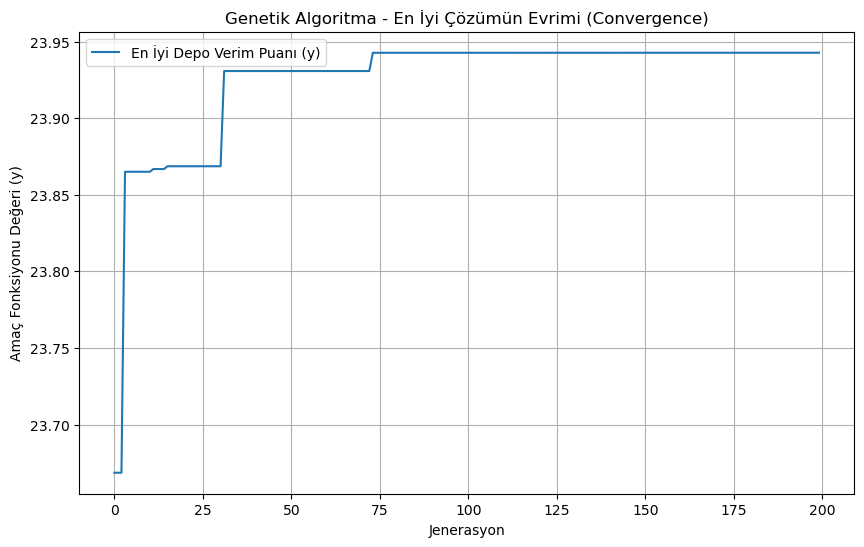

In [22]:
def plot_convergence(history):
    """
    İterasyonlara (jenerasyonlara) göre en iyi amaç fonksiyonu değerinin değişimini çizer.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(history, label='En İyi Depo Verim Puanı (y)')
    plt.title('Genetik Algoritma - En İyi Çözümün Evrimi (Convergence)')
    plt.xlabel('Jenerasyon')
    plt.ylabel('Amaç Fonksiyonu Değeri (y)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Grafiği Çizdir
plot_convergence(history)